# Decision Tree is best for this dataset.

# Logistic Regression

In [55]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [56]:
salarydf=pd.read_csv('salaries.csv')
print(salarydf.to_string())

       company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     b

In [57]:
salarydf.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [58]:
salarydf.shape

(16, 4)

In [59]:
salarydf['company'].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

In [60]:
salarydf['job'].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

In [61]:
salarydf['degree'].unique()

array(['bachelors', 'masters'], dtype=object)

In [62]:
salarydf['company']=salarydf['company'].replace({'google':0,'abc pharma':1,'facebook':2})
salarydf['job']=salarydf['job'].replace({'sales executive':0,'business manager':1,'computer programmer':2})
salarydf['degree']=salarydf['degree'].replace({'bachelors':0,'masters':1})

In [63]:
print(salarydf.to_string())

    company  job  degree  salary_more_then_100k
0         0    0       0                      0
1         0    0       1                      0
2         0    1       0                      1
3         0    1       1                      1
4         0    2       0                      0
5         0    2       1                      1
6         1    0       1                      0
7         1    2       0                      0
8         1    1       0                      0
9         1    1       1                      1
10        2    0       0                      1
11        2    0       1                      1
12        2    1       0                      1
13        2    1       1                      1
14        2    2       0                      1
15        2    2       1                      1


In [64]:
print(salarydf.corr().to_string())

                            company           job    degree  salary_more_then_100k
company                1.000000e+00  4.053961e-17  0.000000               0.447214
job                    4.053961e-17  1.000000e+00 -0.158114               0.163299
degree                 0.000000e+00 -1.581139e-01  1.000000               0.258199
salary_more_then_100k  4.472136e-01  1.632993e-01  0.258199               1.000000


<Axes: xlabel='company'>

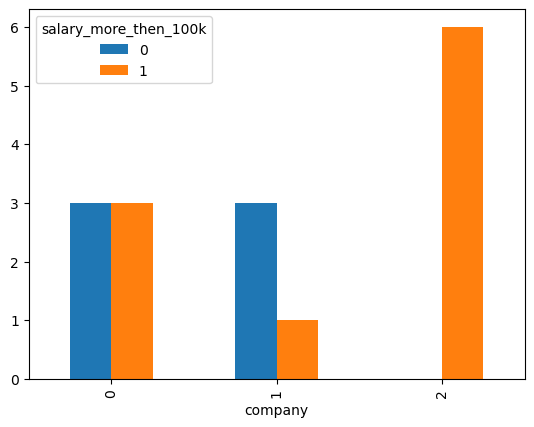

In [17]:
pd.crosstab(salarydf['company'],salarydf['salary_more_then_100k']).plot(kind='bar')

<Axes: xlabel='company'>

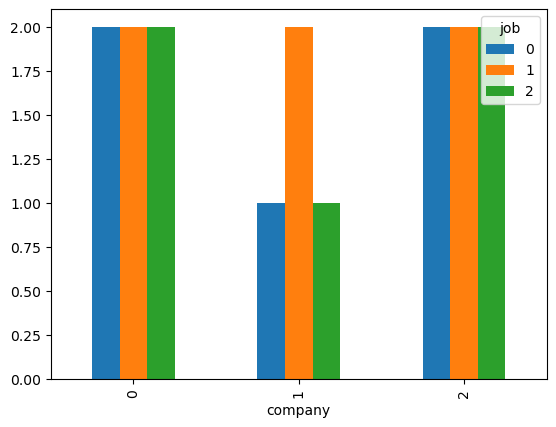

In [18]:
pd.crosstab(salarydf['company'],salarydf['job']).plot(kind='bar')

In [65]:
x=salarydf[['company','job','degree']]
y=salarydf['salary_more_then_100k']

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(12, 3)
(4, 3)


In [68]:
LogModel=LogisticRegression()
LogModel.fit(x_train,y_train)

LogisticRegression()

In [69]:
LogModel.predict(x_test)

array([1, 1, 1, 1], dtype=int64)

In [71]:
LogModel.score(x_test,y_test)

0.5

In [72]:
LogModel1=LogisticRegression()
LogModel1.fit(x,y)

LogisticRegression()

In [74]:
LogModel.predict([[0,2,1]])

array([1], dtype=int64)

In [75]:
LogModel1.score(x,y)

0.75

# DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [38]:
x1=salarydf[['company','job']]
y1=salarydf['salary_more_then_100k']

In [39]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)

In [40]:
DecModel=DecisionTreeClassifier()
DecModel.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [41]:
DecModel.predict(x1_test)

array([1, 1, 0, 0], dtype=int64)

In [42]:
DecModel.score(x1_test,y1_test)

1.0

In [43]:
DecModel1=DecisionTreeClassifier()
DecModel1.fit(x1,y1)

DecisionTreeClassifier()

In [44]:
DecModel.predict([[0,2],[1,0]])

array([0, 0], dtype=int64)

In [45]:
DecModel1.score(x1,y1)

0.875

# Linear regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
x2=salarydf[['company','job']]
y2=salarydf['salary_more_then_100k']

In [51]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.20)

In [52]:
LinModel=LinearRegression()
LinModel.fit(x2_train,y2_train)

LinearRegression()

In [53]:
LinModel.predict(x2_test)

array([0.13333333, 0.16666667, 0.86666667, 0.83333333])

In [54]:
LinModel.score(x2_test,y2_test)

0.0